In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Seaborn for easier visualization
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



The Pima Indians dataset is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
Explore correlations of features with the outcome column. You can do this in several ways, for example using the sns.pairplot we used above or drawing a heatmap of the correlations.
Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
Prepare your final X and y variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [72]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Data SocietyL (2)\\
zero_to_deep_learning_video-master\\data\\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


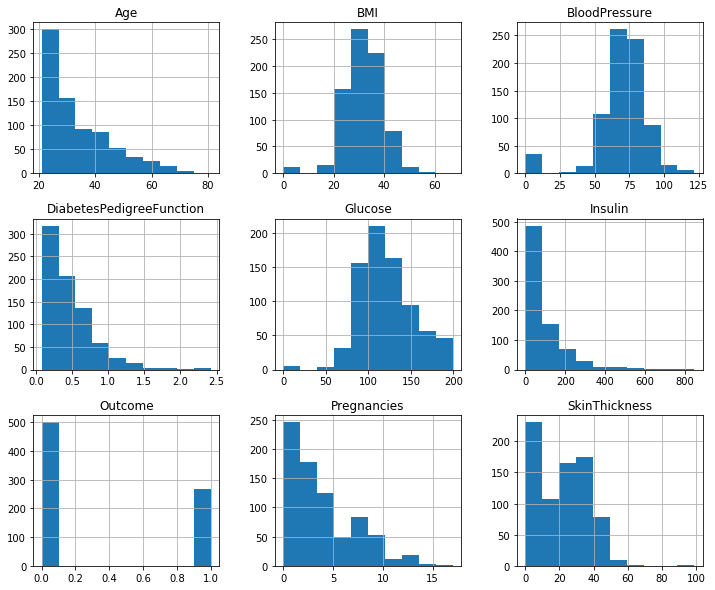

In [73]:
_ = df.hist(figsize=(12, 10))

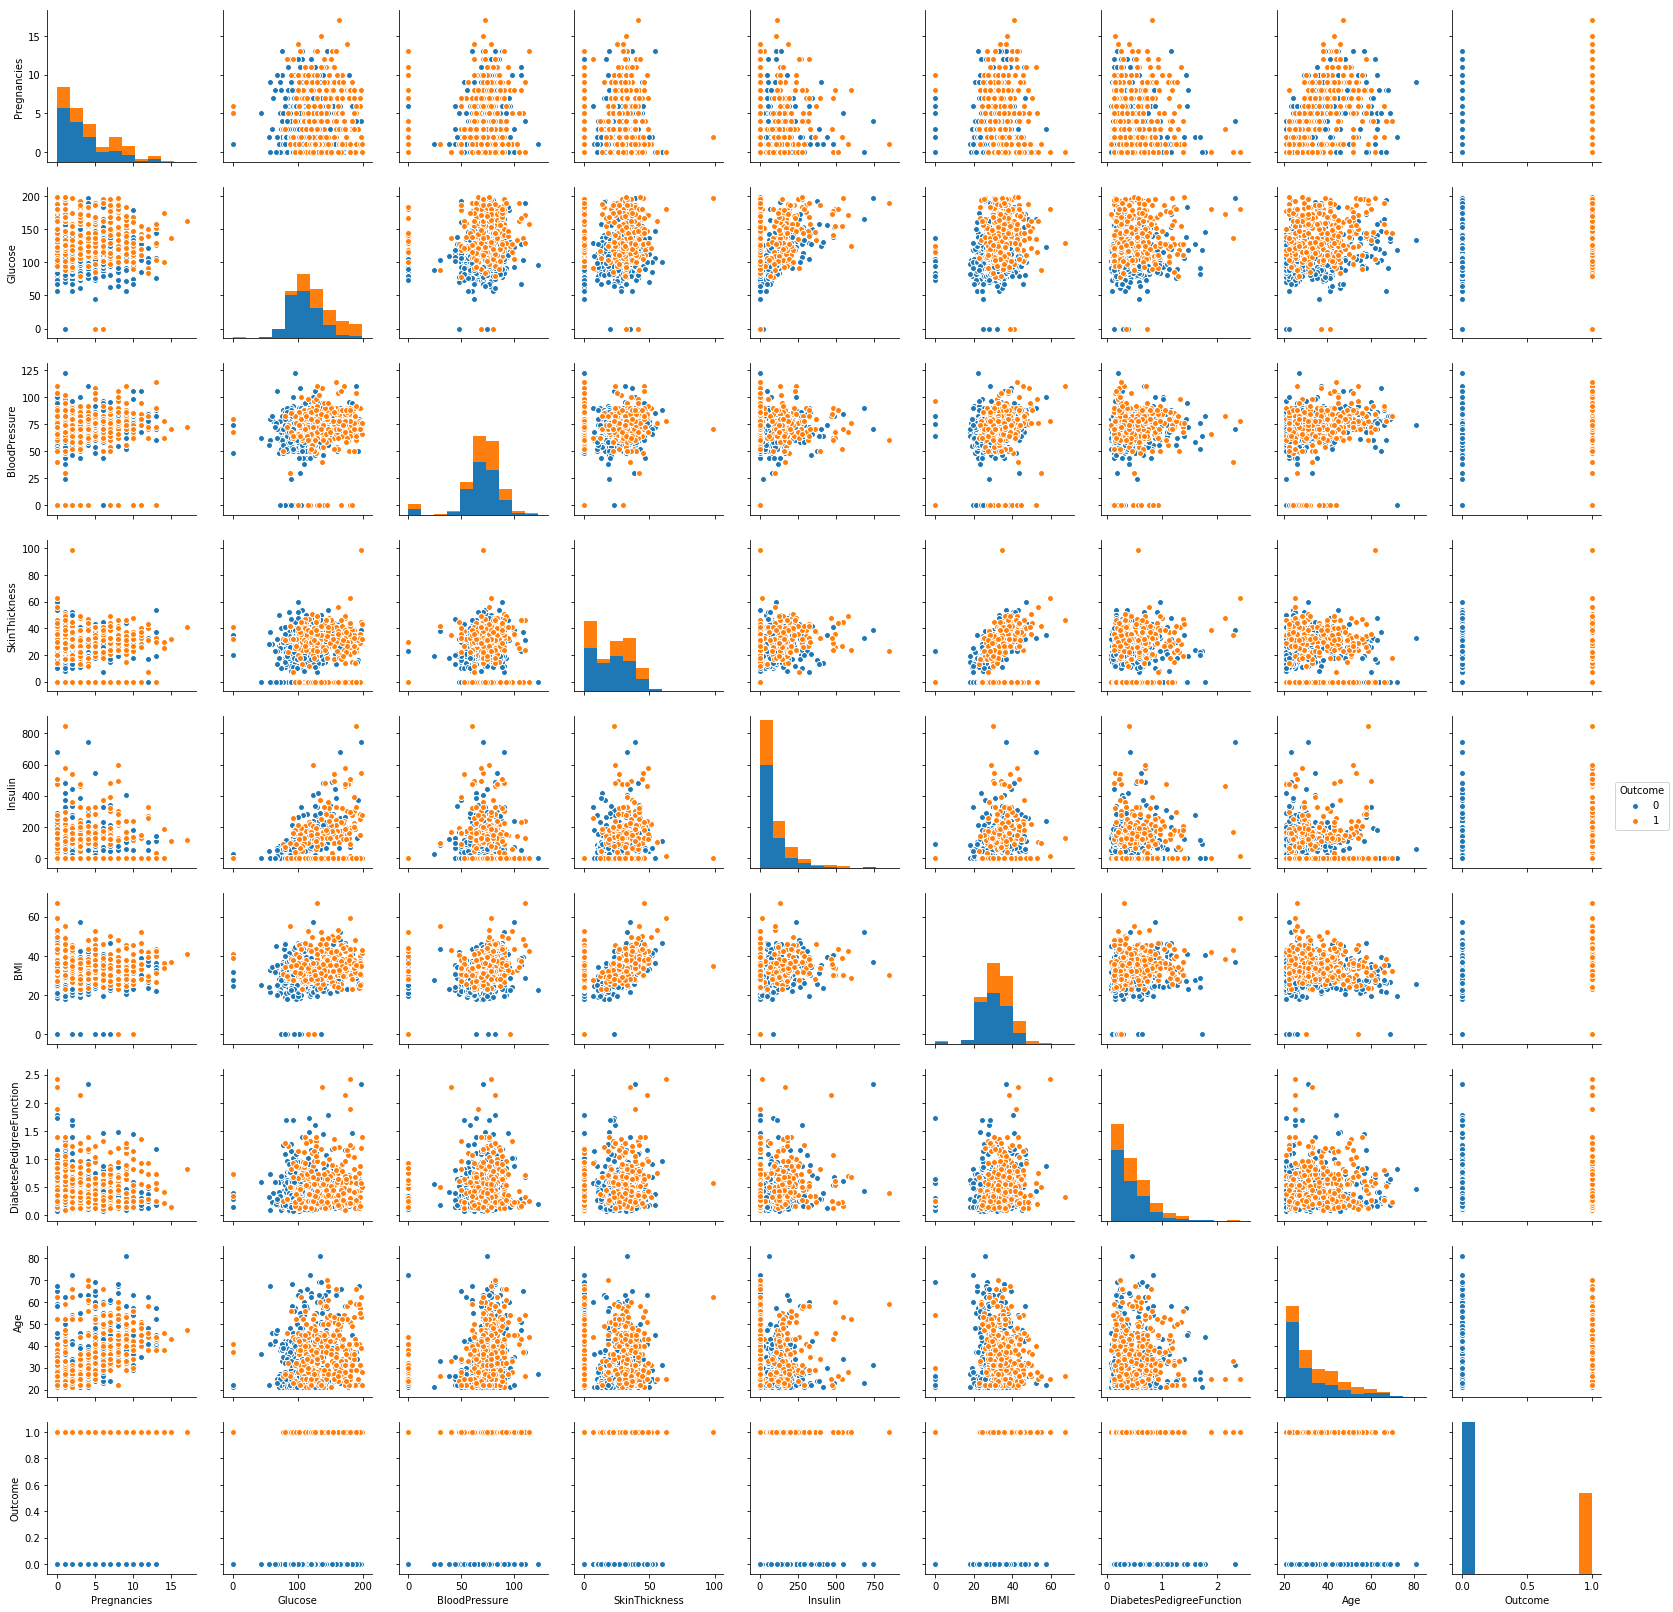

In [74]:
import seaborn as sns
sns.pairplot(df, hue='Outcome')

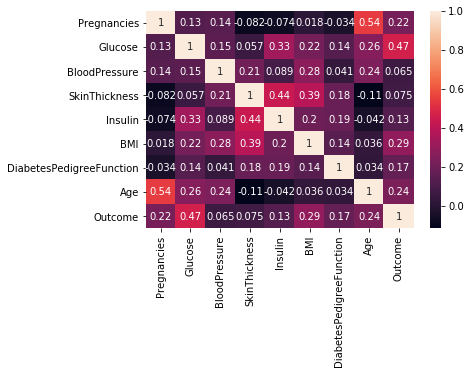

In [75]:
sns.heatmap(df.corr(), annot = True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

sc = StandardScaler()
X = sc.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values
y_cat = to_categorical(y)

In [79]:
X.shape

(768, 8)

In [80]:
y_cat.shape

(768, 2)

Build a fully connected NN model that predicts diabetes. Follow these steps:

Split your data in a train/test with a test size of 20% and a random_state = 22

define a sequential model with at least one inner layer. You will have to make choices for the following things:
what is the size of the input?

how many nodes will you use in each layer?

what is the size of the output?

what activation functions will you use in the inner layers?

what activation function will you use at output?

what loss function will you use?

what optimizer will you use?

fit your model on the training set, using a validation_split of 0.1
test your trained model on the test data from the train/test split
check the accuracy score, the confusion matrix and the classification report

In [81]:
X.shape

(768, 8)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    random_state=22,
                                                    test_size=0.2)

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [84]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [86]:
32*8 + 32

288

In [87]:
model.fit(X_train, y_train, epochs=20, verbose=2, validation_split=0.1)

Train on 552 samples, validate on 62 samples
Epoch 1/20
 - 0s - loss: 0.5441 - acc: 0.7283 - val_loss: 0.5214 - val_acc: 0.8065
Epoch 2/20
 - 0s - loss: 0.5162 - acc: 0.7518 - val_loss: 0.5090 - val_acc: 0.7903
Epoch 3/20
 - 0s - loss: 0.4656 - acc: 0.7862 - val_loss: 0.4986 - val_acc: 0.7903
Epoch 4/20
 - 0s - loss: 0.4700 - acc: 0.7699 - val_loss: 0.5253 - val_acc: 0.7903
Epoch 5/20
 - 0s - loss: 0.4378 - acc: 0.7681 - val_loss: 0.5270 - val_acc: 0.7742
Epoch 6/20
 - 0s - loss: 0.4361 - acc: 0.8007 - val_loss: 0.5987 - val_acc: 0.7581
Epoch 7/20
 - 0s - loss: 0.4436 - acc: 0.7899 - val_loss: 0.5355 - val_acc: 0.8226
Epoch 8/20
 - 0s - loss: 0.4482 - acc: 0.7790 - val_loss: 0.4491 - val_acc: 0.8226
Epoch 9/20
 - 0s - loss: 0.4285 - acc: 0.8080 - val_loss: 0.6122 - val_acc: 0.8065
Epoch 10/20
 - 0s - loss: 0.4311 - acc: 0.7880 - val_loss: 0.5506 - val_acc: 0.7581
Epoch 11/20
 - 0s - loss: 0.4028 - acc: 0.8116 - val_loss: 0.6485 - val_acc: 0.7903
Epoch 12/20
 - 0s - loss: 0.4294 - acc: 

In [88]:
y_pred = model.predict(X_test)

In [89]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [91]:
pd.Series(y_test_class).value_counts() / len(y_test_class)

0    0.649351
1    0.350649
dtype: float64

In [92]:
accuracy_score(y_test_class, y_pred_class)

0.7077922077922078

In [93]:
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       0.74      0.84      0.79       100
          1       0.61      0.46      0.53        54

avg / total       0.70      0.71      0.70       154



In [94]:
confusion_matrix(y_test_class, y_pred_class)

array([[84, 16],
       [29, 25]], dtype=int64)

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
    mod.fit(X_train, y_train[:, 1])
    y_pred = mod.predict(X_test)
    print("="*80)
    print(mod)
    print("-"*80)
    print("Accuracy score: {:0.3}".format(accuracy_score(y_test_class,
                                                         y_pred)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class, y_pred))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
--------------------------------------------------------------------------------
Accuracy score: 0.721
Confusion Matrix:
[[86 14]
 [29 25]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Accuracy score: 0.721
Confusion Matrix:
[[89 11]
 [32 22]]

GaussianNB(priors=None)
------------------------------------------------

# Deep Learning Intro

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

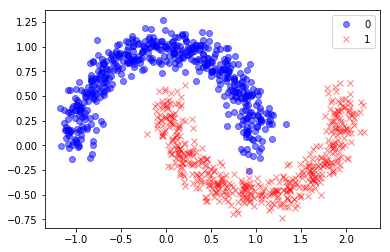

In [97]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [100]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [101]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 177us/step


In [102]:
results

[0.3173280574878057, 0.8466666674613953]

In [103]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


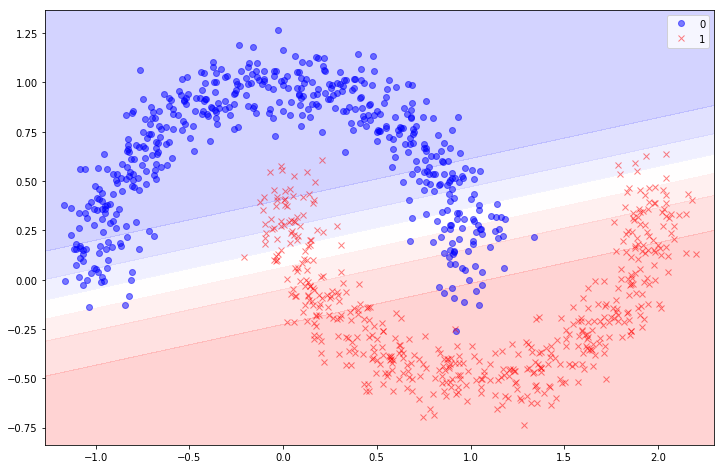

In [104]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

# Deep Model

In [105]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [106]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [107]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 218us/step


[0.019716442551580258, 0.9966666666666667]

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [109]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.996
The Accuracy score on the Test set is:	0.997


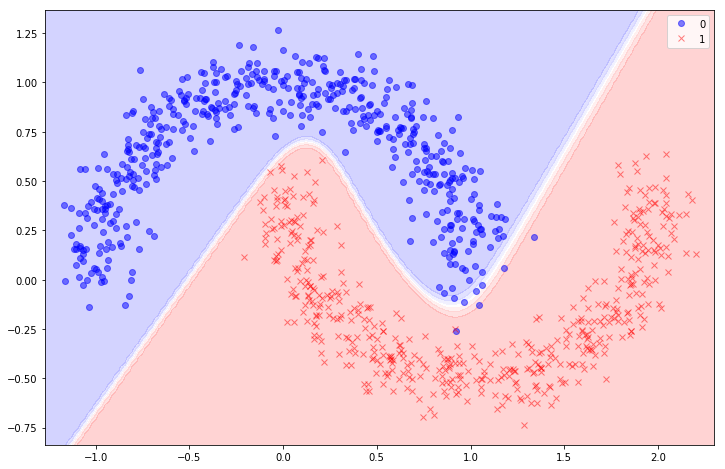

In [110]:
plot_decision_boundary(model, X, y)

## Multiclass Classification

In [111]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Data SocietyL (2)\\
zero_to_deep_learning_video-master\\data\\iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


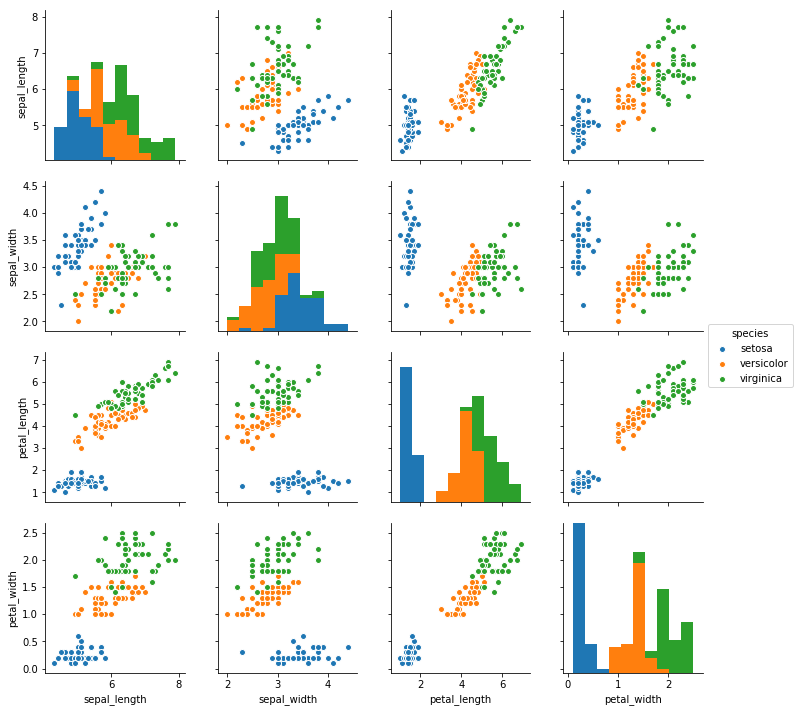

In [112]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [122]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Gradient Decent

In [131]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Data SocietyL (2)\\
zero_to_deep_learning_video-master\\data\\banknotes.csv')
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [132]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [133]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

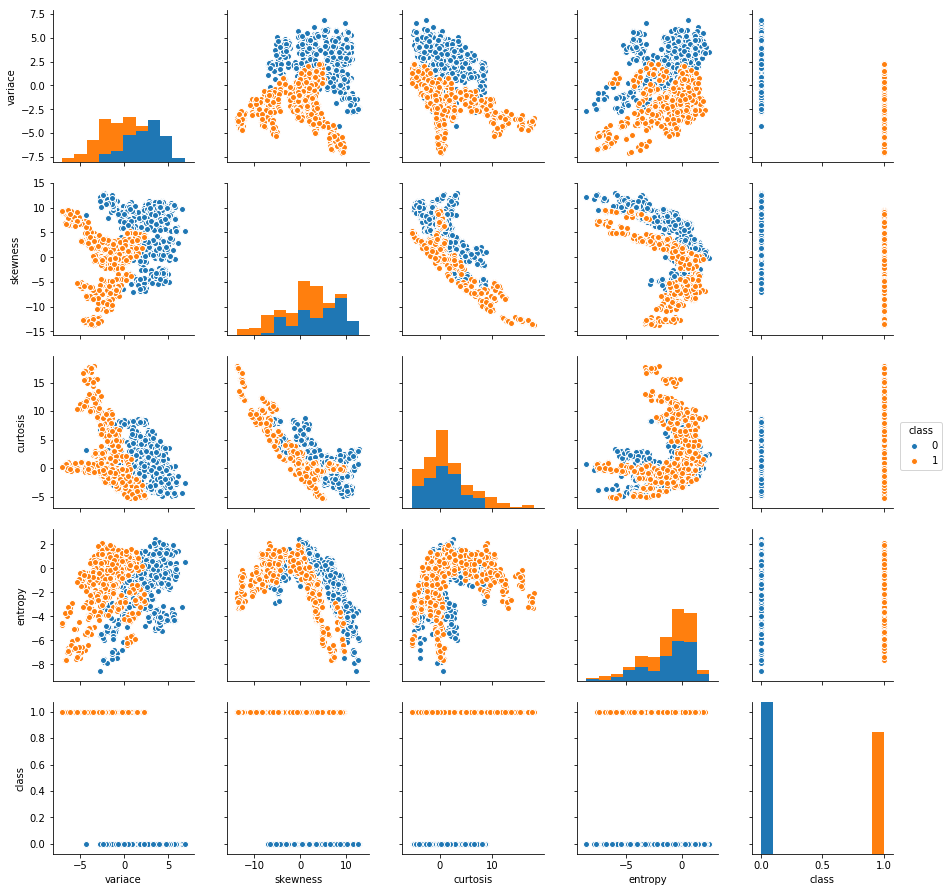

In [134]:
import seaborn as sns
sns.pairplot(df, hue="class")

In [135]:
#Baseline Model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale #standard Scaler

In [136]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [137]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99126638, 0.9868709 , 0.99343545])

# Logistic Regression Model

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [139]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [140]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/1
412/412 [==============================] - 0s 68us/step


In [141]:
historydf = pd.DataFrame(history.history, index=history.epoch)

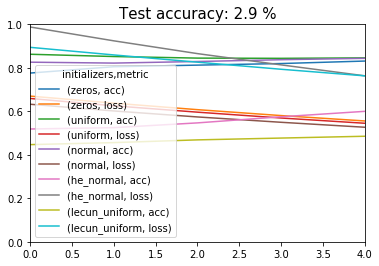

In [200]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[0]*100), fontsize=15 )

# Learning Rates

In [150]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [151]:
historydf = pd.concat(dflist, axis=1)

In [155]:
historydf

learning_rate     0.01                0.05                0.10            \
metric             acc      loss       acc      loss       acc      loss   
0              0.43125  0.836112  0.772917  0.482545  0.873958  0.389351   

learning_rate     0.50            
metric             acc      loss  
0              0.86875  0.324952

In [156]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [157]:
historydf

learning_rate     0.01                0.05                0.10            \
metric             acc      loss       acc      loss       acc      loss   
0              0.43125  0.836112  0.772917  0.482545  0.873958  0.389351   

learning_rate     0.50            
metric             acc      loss  
0              0.86875  0.324952

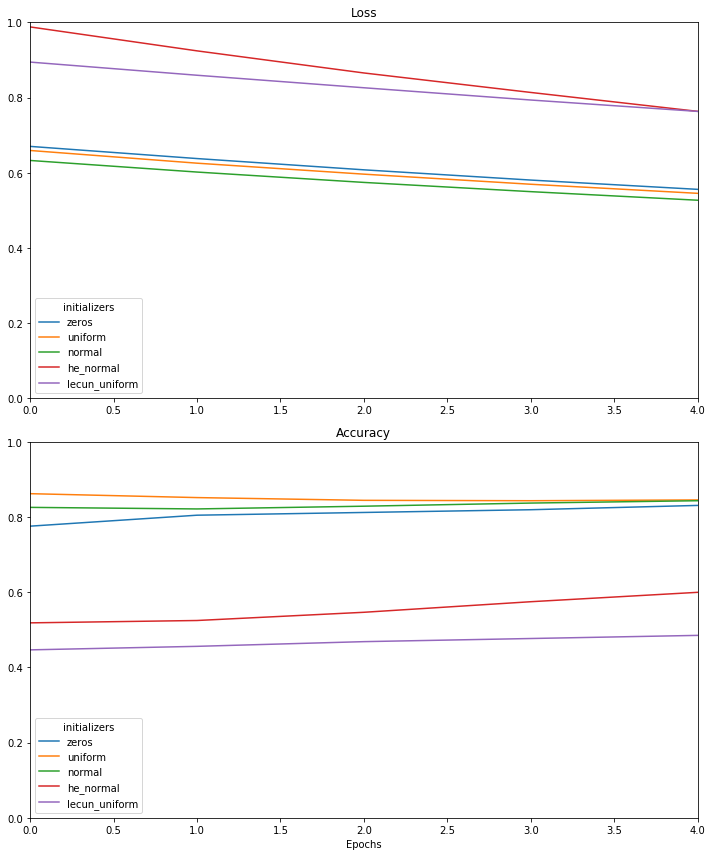

In [197]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax,figsize=(10,12))
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax,figsize=(10,12))
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Batch Sizes

In [159]:
# what happens when you change teh batch sizes on learning data
dflist = []

#huge batch size small convergence, small batch size fast convergence
batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [160]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [161]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.776042  0.456881  0.516667  0.799476  0.219792  1.104695   

batch_size       128            
metric           acc      loss  
0           0.652083  0.575673

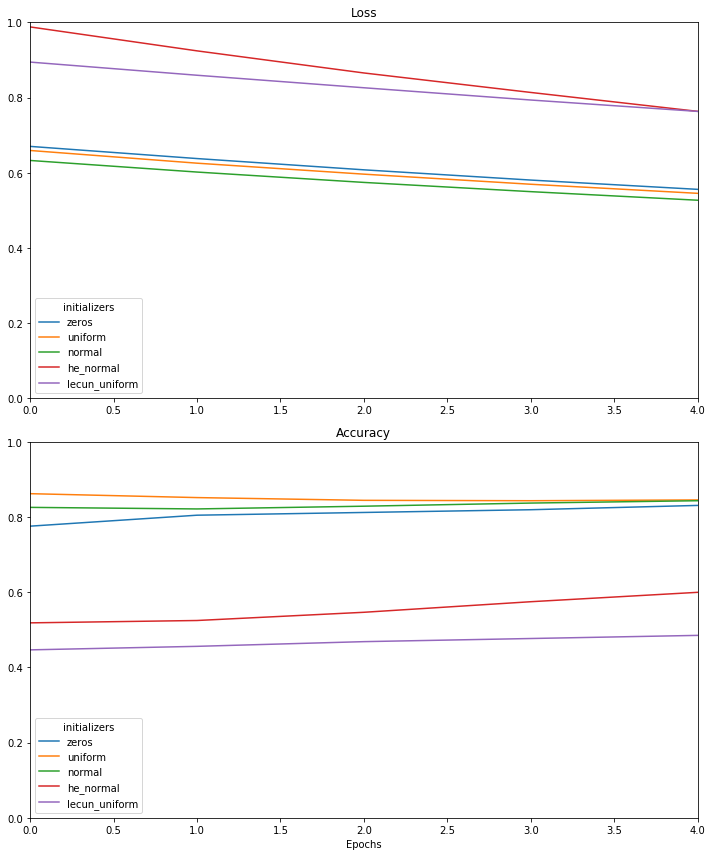

In [196]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax,figsize=(10,12))
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax,figsize=(10,12))
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Optimizers

In [163]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [221]:
dflist = []

optimizers = ['SGD(lr=0.01)', #plain stocastic Gradient Decent
              'SGD(lr=0.01, momentum=0.3)', # witg momentum 0.3
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  #nesterov movmentum
              'Adam(lr=0.01)', # Adam
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=34, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [222]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

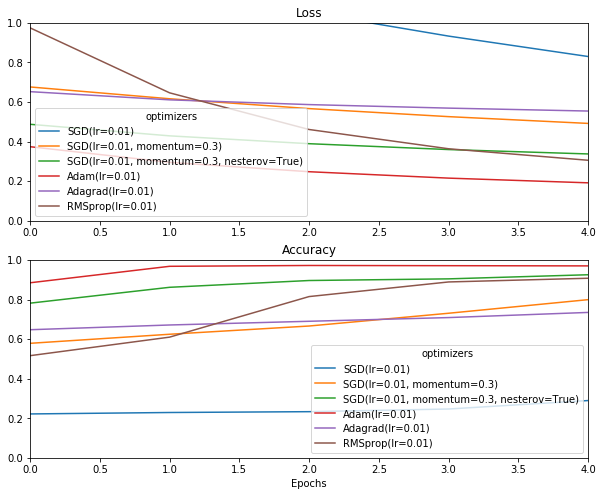

In [223]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax,figsize=(10,8))
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax,figsize=(10,8))
plt.title("Accuracy")
plt.xlabel("Epochs")

#fig = plt.figure(figsize=(10,40))
#plt.tight_layout()
#plt.subplots(figsize=(20, 10))

# Initialization

In [224]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [225]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

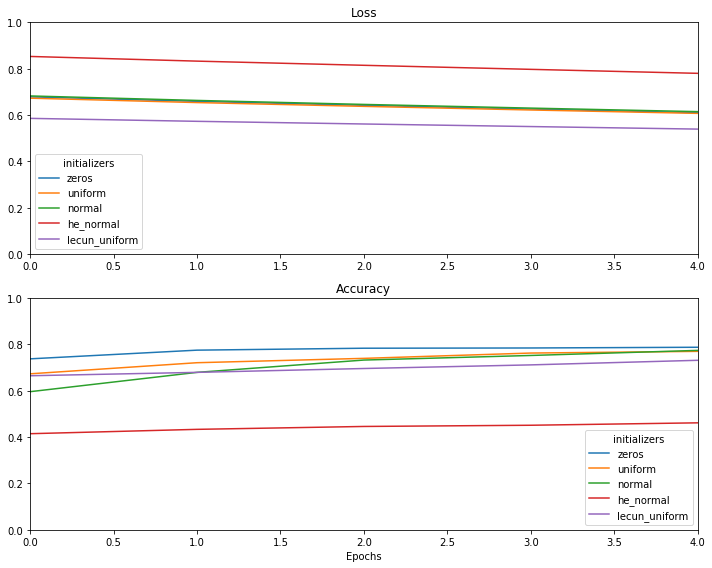

In [227]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax,figsize=(10,8))
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax,figsize=(10,8))
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Inner Layer Representation

In [228]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=34, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s 190us/step - loss: 0.5786 - acc: 0.7961 - val_loss: 0.5122 - val_acc: 0.8715
Epoch 2/20
672/672 [==============================] - 0s 19us/step - loss: 0.4927 - acc: 0.8646 - val_loss: 0.4340 - val_acc: 0.8889
Epoch 3/20
672/672 [==============================] - 0s 19us/step - loss: 0.3988 - acc: 0.9033 - val_loss: 0.3375 - val_acc: 0.9375
Epoch 4/20
672/672 [==============================] - 0s 19us/step - loss: 0.2963 - acc: 0.9315 - val_loss: 0.2494 - val_acc: 0.9410
Epoch 5/20
672/672 [==============================] - 0s 21us/step - loss: 0.2140 - acc: 0.9464 - val_loss: 0.1806 - val_acc: 0.9653
Epoch 6/20
672/672 [==============================] - 0s 21us/step - loss: 0.1552 - acc: 0.9583 - val_loss: 0.1297 - val_acc: 0.9687
Epoch 7/20
672/672 [==============================] - 0s 22us/step - loss: 0.1149 - acc: 0.9628 - val_loss: 0.0976 - val_acc: 0.9757
Epoch 8/20
672/672 [==

In [229]:
result

[0.033135686738832486, 0.9854368932038835]

In [230]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [231]:
model.layers

In [232]:
inp = model.layers[0].input
out = model.layers[0].output

In [233]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [234]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [235]:
features_function = K.function([inp], [out])

In [236]:
features_function

In [237]:
features_function([X_test])[0].shape

(412, 2)

In [238]:
features = features_function([X_test])[0]

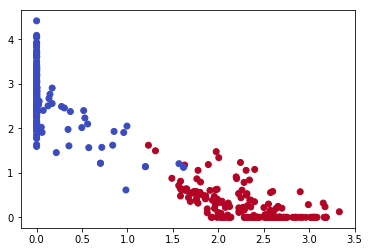

In [239]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [240]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 10us/step


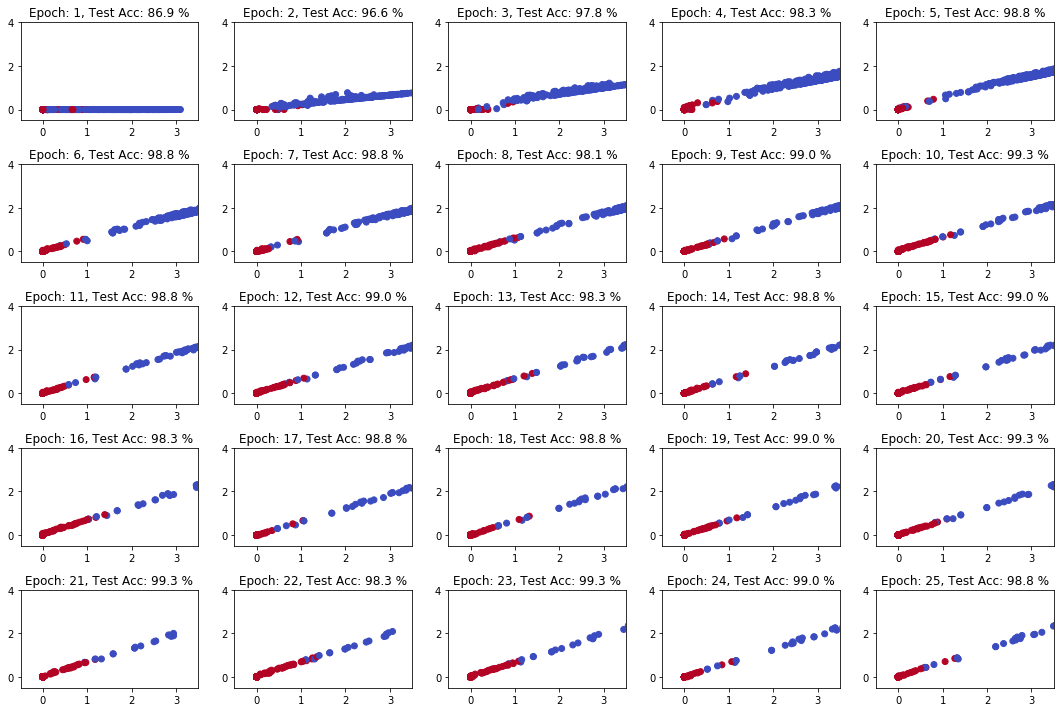

In [241]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

## Gradient Decent Practice

Use the column called "Class" as target

Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification

Use all the other columns as features, check their range and distribution (using seaborn pairplot)

Rescale all the features using either MinMaxScaler or StandardScaler

Build a deep model with at least 1 hidden layer to classify the data

Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?

Choose an optimizer

Choose a value for the learning rate, you may want to try with several values

Choose a batch size

Train your model on all the data using a validation_split=0.2. Can you converge to 100% validation accuracy?

What's the minumum number of epochs to converge?

Repeat the training several times to verify how stable your results are


In [242]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\User\\Desktop\\Data SocietyL (2)\\
zero_to_deep_learning_video-master\\data\\wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [244]:
y = df['Class']

In [245]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [246]:
y_cat = pd.get_dummies(y)

In [247]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [248]:
X = df.drop('Class', axis=1)

In [249]:
X.shape # 13 features

(178, 13)

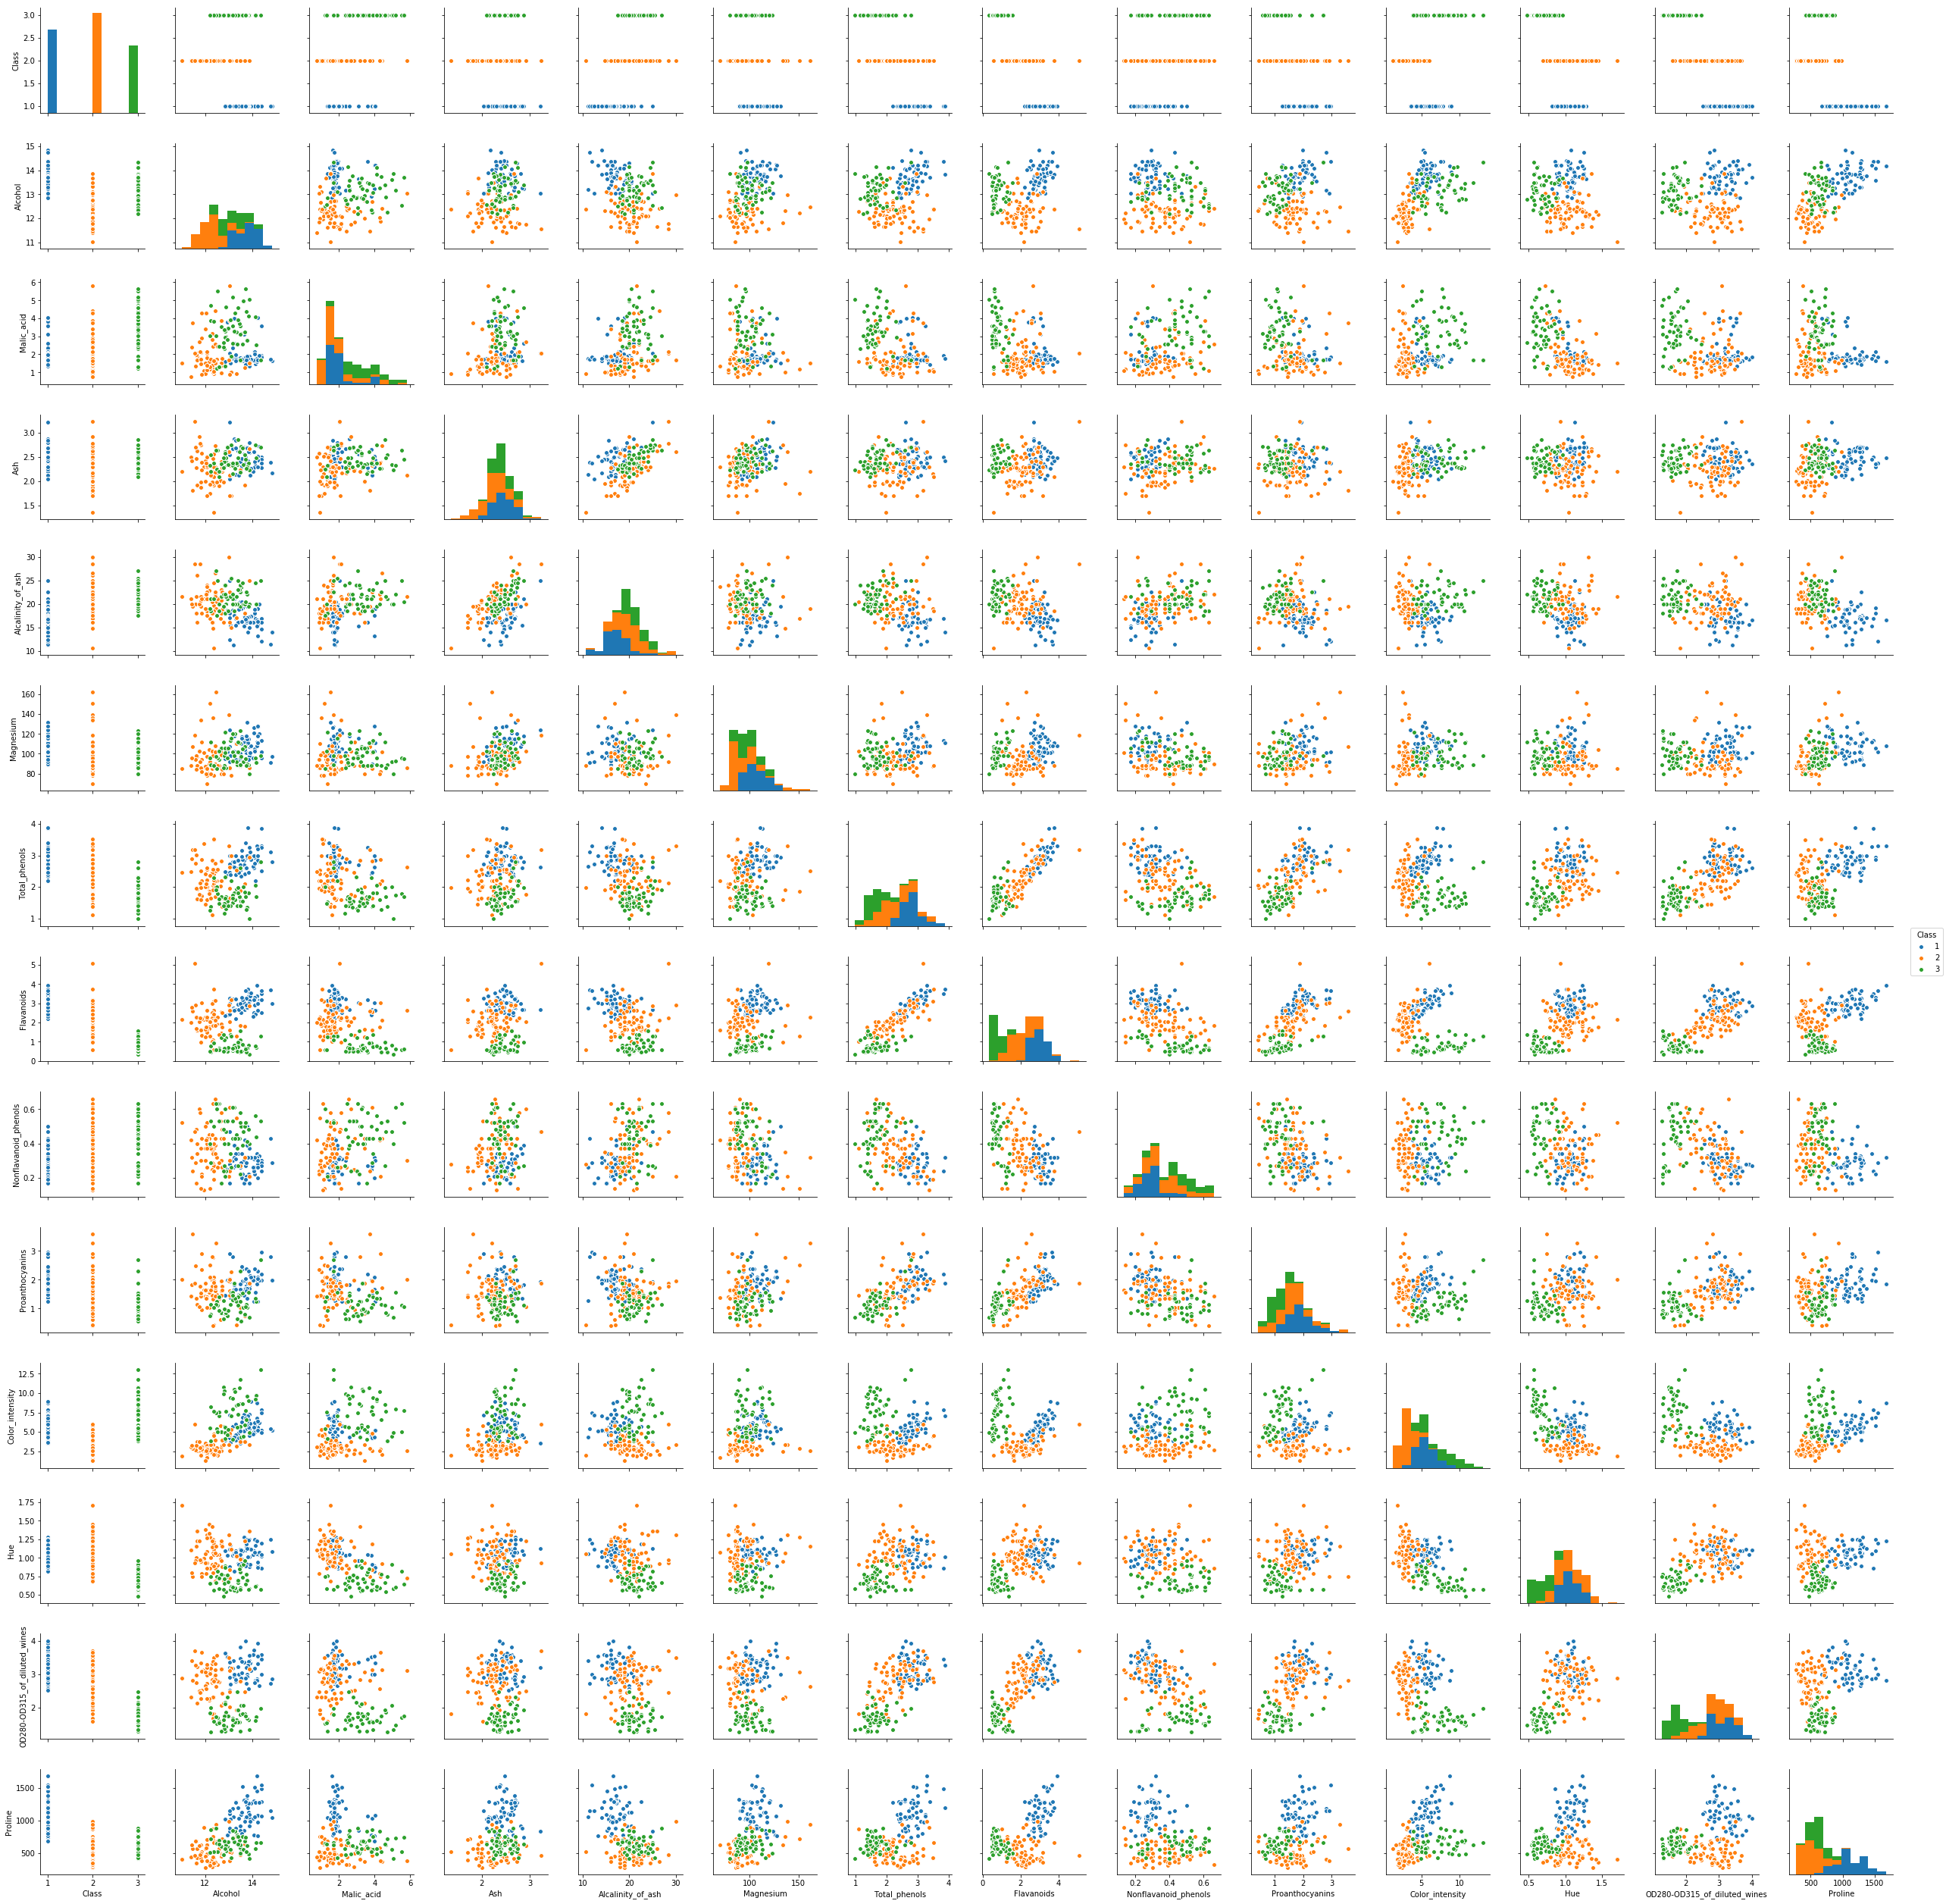

In [250]:
import seaborn as sns
sns.pairplot(df, hue='Class')

In [251]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsc = sc.fit_transform(X)
# rescale our features normalization

In [252]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

In [253]:
K.clear_session()
model = Sequential()
model.add(Dense(5, input_shape=(13,),
                kernel_initializer='he_normal',
                activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.1),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=8,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 0s 733us/step - loss: 0.4715 - acc: 0.8873 - val_loss: 9.1583e-04 - val_acc: 1.0000
Epoch 2/10
142/142 [==============================] - 0s 77us/step - loss: 0.1170 - acc: 0.9789 - val_loss: 5.3515e-04 - val_acc: 1.0000
Epoch 3/10
142/142 [==============================] - 0s 75us/step - loss: 0.0600 - acc: 0.9859 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 4/10
142/142 [==============================] - 0s 84us/step - loss: 0.0554 - acc: 0.9789 - val_loss: 0.0227 - val_acc: 0.9722
Epoch 5/10
142/142 [==============================] - 0s 84us/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 6/10
142/142 [==============================] - 0s 84us/step - loss: 0.0638 - acc: 0.9859 - val_loss: 7.8906e-05 - val_acc: 1.0000
Epoch 7/10
142/142 [==============================] - 0s 84us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 2.1766e-05 - val_acc: 1.0000
Epoch 8

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

Build a deep fully connected network with the following structure:

Layer 1: 8 nodes
Layer 2: 5 nodes
Layer 3: 2 nodes
Output : 3 nodes

Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)

Remember to train the model on the scaled data
Define a Feature Function like we did above between the input of the 1st layer and the output of the 3rd layer
Calculate the features and plot them on a 2-dimensional scatter plot
Can we distinguish the 3 classes well?

In [254]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,),
                kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
178/178 [==============================] - 0s 684us/step - loss: 0.7007 - acc: 0.7247
Epoch 2/20
178/178 [==============================] - 0s 50us/step - loss: 0.3107 - acc: 0.9326
Epoch 3/20
178/178 [==============================] - 0s 62us/step - loss: 0.1785 - acc: 0.9719
Epoch 4/20
178/178 [==============================] - 0s 50us/step - loss: 0.1601 - acc: 0.9607
Epoch 5/20
178/178 [==============================] - 0s 50us/step - loss: 0.0932 - acc: 0.9831
Epoch 6/20
178/178 [==============================] - 0s 45us/step - loss: 0.1190 - acc: 0.9719
Epoch 7/20
178/178 [==============================] - 0s 45us/step - loss: 0.0607 - acc: 0.9831
Epoch 8/20
178/178 [==============================] - 0s 39us/step - loss: 0.0189 - acc: 1.0000
Epoch 9/20
178/178 [==============================] - 0s 45us/step - loss: 0.0192 - acc: 0.9944
Epoch 10/20
178/178 [==============================] - 0s 39us/step - loss: 0.1507 - acc: 0.9607
Epoch 11/20
178/178 [=================

In [255]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [258]:
inp = model.layers[0].input
out = model.layers[2].output
features_function = K.function([inp], [out])
features = features_function([Xsc])[0]

In [259]:
features.shape

(178, 2)

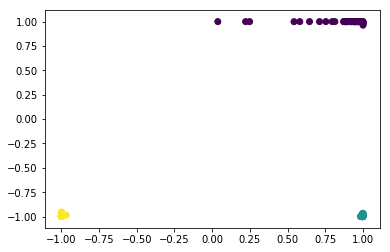

In [260]:
plt.scatter(features[:, 0], features[:, 1], c=y)

# Functional API

- define an input layer called inputs
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a second_to_last layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [261]:
from keras.layers import Input
from keras.models import Model

In [262]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
178/178 [==============================] - 0s 740us/step - loss: 0.5554 - acc: 0.8146
Epoch 2/20
178/178 [==============================] - 0s 45us/step - loss: 0.2115 - acc: 0.9719
Epoch 3/20
178/178 [==============================] - 0s 45us/step - loss: 0.1225 - acc: 0.9831
Epoch 4/20
178/178 [==============================] - 0s 39us/step - loss: 0.0619 - acc: 0.9944
Epoch 5/20
178/178 [==============================] - 0s 45us/step - loss: 0.0552 - acc: 0.9888
Epoch 6/20
178/178 [==============================] - 0s 50us/step - loss: 0.0551 - acc: 0.9831
Epoch 7/20
178/178 [==============================] - 0s 45us/step - loss: 0.0135 - acc: 1.0000
Epoch 8/20
178/178 [==============================] - 0s 45us/step - loss: 0.0071 - acc: 1.0000
Epoch 9/20
178/178 [==============================] - 0s 39us/step - loss: 0.0043 - acc: 1.0000
Epoch 10/20
178/178 [==============================] - 0s 45us/step - loss: 0.0026 - acc: 1.0000
Epoch 11/20
178/178 [=================

In [263]:
features_function = K.function([inputs], [second_to_last])

In [264]:
features = features_function([Xsc])[0]

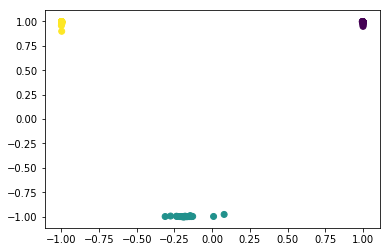

In [265]:
plt.scatter(features[:, 0], features[:, 1], c=y)

# Each Epoc Example

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their documentation is here. Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

Split the data into train and test sets with a test_size = 0.3 and random_state=42
Reset and recompile your model

train the model on the train data using validation_data=(X_test, y_test)
Use the EarlyStopping callback to stop your training if the val_loss doesn't improve
Use the ModelCheckpoint callback to save the trained model to disk once training is finished
Use the TensorBoard callback to output your training information to a /tmp/ subdirectory
Watch the next video for an overview of tensorboard

In [266]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [267]:
checkpointer = ModelCheckpoint(filepath="/tmp/udemy/weights.hdf5",
                               verbose=1, save_best_only=True)

In [268]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto') # when its not improving any longer it stops

In [269]:
tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [272]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=200, verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, earlystopper, tensorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/20
 - 0s - loss: 0.7019 - acc: 0.7258 - val_loss: 0.4327 - val_acc: 0.8889

Epoch 00001: val_loss improved from inf to 0.43272, saving model to /tmp/udemy/weights.hdf5
Epoch 2/20
 - 0s - loss: 0.3518 - acc: 0.9032 - val_loss: 0.2616 - val_acc: 0.9630

Epoch 00002: val_loss improved from 0.43272 to 0.26162, saving model to /tmp/udemy/weights.hdf5
Epoch 3/20
 - 0s - loss: 0.2192 - acc: 0.9597 - val_loss: 0.2162 - val_acc: 0.9630

Epoch 00003: val_loss improved from 0.26162 to 0.21623, saving model to /tmp/udemy/weights.hdf5
Epoch 4/20
 - 0s - loss: 0.1167 - acc: 1.0000 - val_loss: 0.1511 - val_acc: 0.9815

Epoch 00004: val_loss improved from 0.21623 to 0.15112, saving model to /tmp/udemy/weights.hdf5
Epoch 5/20
 - 0s - loss: 0.0830 - acc: 1.0000 - val_loss: 0.1299 - val_acc: 0.9815

Epoch 00005: val_loss improved from 0.15112 to 0.12986, saving model to /tmp/udemy/weights.hdf5
Epoch 6/20
 - 0s - loss: 0.0613 - acc: 1.0000 - val_loss: 0

Run Tensorboard with the command:

tensorboard --logdir /tmp/udemy/tensorboard/

and open your browser at http://localhost:6006